<b>Libraries</b>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

<b>Methods and functions</b>

In [43]:
def is_overexposed_or_underexposed(white_percent):
    #Validating overexposure and applying CLAHE algorithm
    if(white_percent > 70):
        clahe = cv2.createCLAHE(clipLimit=8.0,tileGridSize=(10,10))
        cl1 = clahe.apply(grey) #New image in grey scale without overexposure problem
        return cl1
    else:
        #Validating underexposure and applying CLAHE algorithm
        if(white_percent < 25):
            gamma = 1.5 #Gamma factor
            gamma_table = [((i / 255.0) ** (1 / gamma)) * 255 for i in range(256)]
            gamma_table = np.array(gamma_table,dtype=np.uint8)
            grey_gamma = cv2.LUT(grey,gamma_table) #Applying Gamma correction
            clahe = cv2.createCLAHE(clipLimit=8.0,tileGridSize=(10,10))
            cl1 = clahe.apply(grey) #New image in grey scale without overexposure problem
            return cl1
        
def salt_and_pepper_noise_elimination():
    img_median = cv2.medianBlur(grey, 5)
    return img_median

<b>Main program</b>

In [13]:
img_name = input("Enter image name : ")

Enter image name : lena salt-and-pepper


In [70]:
#Uploading image
img = cv2.imread(img_name+'.jpg')
img.shape #nxmxk where n = number of rows, m = number of cols, k = number of channels (are 3 for Red, Greend and Blue)

(600, 600, 3)

In [71]:
#Converting the image to grey scale
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape #nxm where n = number of rows, m = number of cols, there's is just 1 matrix where min value is black = 0 and max value is white = 255

(600, 600)

In [72]:
#OVEREXPOSURE AND UNDEREXPOSURE
#Calculating threshold with OTSU, thresh is the binary image
ret, thresh = cv2.threshold(grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh.shape #nxm where n = number of rows, m = number of cols, there's is just 1 matrix where there are just 2 values (0 and 255)

(600, 600)

In [73]:
#Calculating the percent of white pixels (255) in the binary image
white_pixels = cv2.countNonZero(thresh) 
total_pixels = img.shape[0] * img.shape[1]
white_percent = (white_pixels / total_pixels) * 100

In [74]:
#Validating overexposure and underexposure
if(white_percent > 70 or white_percent < 25):
    grey = is_overexposed_or_underexposed(white_percent)

In [75]:
#SALT-AND-PEPPER NOISE
#Calculating adaptative threshold, adapt_thresh is a binary image
adapt_thresh = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adapt_thresh.shape #nxm where n = number of rows, m = number of cols, there's is just 1 matrix where there are just 2 values (0 and 255)

(600, 600)

In [76]:
#Calculating the number of white and black pixels in the binarized image
n_white_pixels = cv2.countNonZero(adapt_thresh)
n_black_pixels = (adapt_thresh.shape[0] * adapt_thresh.shape[1]) - n_white_pixels

In [77]:
#Calculating the rate of white and black pixels in the binarized image
white_rate = n_white_pixels / (adapt_thresh.shape[0] * adapt_thresh.shape[1])
black_rate = n_black_pixels / (adapt_thresh.shape[0] * adapt_thresh.shape[1])

In [78]:
#Validating salt-and-pepper noise
reference_thresh = 0.1
if white_rate > reference_thresh or black_rate > reference_thres:
    grey = salt_and_pepper_noise_elimination()

In [79]:
#Creating a CascadeClassifier object
#We are going to use the Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [80]:
#Detecting faces
faces = face_cascade.detectMultiScale(grey, 1.3, 5)

In [81]:
#We draw a rectangle around every detected face
for (x,y,w,z) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+z),(255,0,0),2)

In [85]:
#Saving image
cv2.imwrite(img_name+'_with_faces.jpg',img)

True

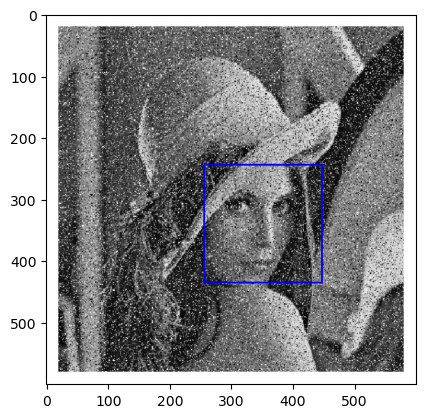

In [84]:
#Show image with detected faces
img_with_faces = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_with_faces)
plt.show()